In [1]:
import xml.etree.ElementTree as ET
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline 

In [41]:
tree = ET.parse('./../dataset/Marmot_data/10.1.1.1.2006_3.xml')
root = tree.getroot()
size = root.find('size')

In [42]:
width = int(size.find('width').text)
height = int(size.find('height').text)
col_mask = np.zeros((height, width), dtype=np.int32)
table_mask = np.zeros((height, width), dtype = np.int32)

In [43]:
col_mask.shape

(1123, 793)

In [44]:
def sameTable(ymin_1, ymin_2, ymax_1, ymax_2):
    min_diff = abs(ymin_1 - ymin_2)
    max_diff = abs(ymax_1 - ymax_2)
    
    if min_diff <= 5 or max_diff <=5:
        return True
    elif min_diff <= 4 and max_diff <=7:
        return True
    elif min_diff <= 7 and max_diff <=4:
        return True
    return False

In [51]:
got_first_column = False
i=0
table_xmin = 10000
table_xmax = 0

table_ymin = 10000
table_ymax = 0

for column in root.findall('object'):
    bndbox = column.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    
    
    if got_first_column:
        if sameTable(prev_ymin, ymin, prev_ymax, ymax) == False:
            i+=1
            got_first_column = False
            table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255
            print("**********")
            print(table_xmin, table_xmax)
            print(table_ymin, table_ymax)
            print("**********")
            
            table_xmin = 10000
            table_xmax = 0

            table_ymin = 10000
            table_ymax = 0
            
    if got_first_column == False:
        got_first_column = True
        first_xmin = xmin
            
    print(xmin, xmax)
    print(ymin, ymax)
    print(i)
    print('==========')
    prev_ymin = ymin
    prev_ymax = ymax
    col_mask[ymin:ymax, xmin:xmax] = 255
    
    table_xmin = min(xmin, table_xmin)
    table_xmax = max(xmax, table_xmax)
    
    table_ymin = min(ymin, table_ymin)
    table_ymax = max(ymax, table_ymax)
    print(table_xmin, table_xmax)
    print(table_ymin, table_ymax)
    print(i)
    print('------------')


458 517
710 785
0
458 517
710 785
0
------------
531 568
710 783
0
458 568
710 785
0
------------
583 619
712 785
0
458 619
710 785
0
------------
637 670
712 784
0
458 670
710 785
0
------------


In [53]:
table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255
print("**********")
print(table_xmin, table_xmax)
print(table_ymin, table_ymax)
print("**********")

**********
458 670
710 785
**********


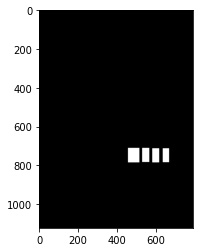

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(col_mask.astype(np.uint8), cmap='gray')

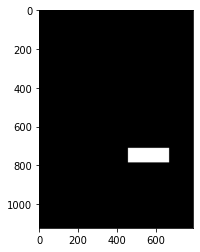

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(table_mask.astype(np.uint8), cmap='gray')